<center><h1>The Lyrics of Ed Sheeran's Songs</h1></center>
![ed-5](ed-5.png "Title")
<center><h2>A Data Visualisation Exercise</h2></center>

## Abstract
Ed Sheeran is one of the hottest artists today (2019). He is the second artist to have 4 songs [cross 1 billion streams on Spotify](https://www.forbes.com/sites/hughmcintyre/2019/01/18/ed-sheeran-is-the-second-musician-to-see-four-hits-reach-one-billion-streams-on-spotify/#23b5263e5319). In this exercise, I want to see his songwriting prowess, in particular the lyrics he uses in his songs. 

Most of his songs revolve around love like Perfect, Thinking Out Loud and Shape of You. Hence, I expect to see many words that are related to these themes.

## Data Collection
I collected lyrics of 167 songs that belong to Ed Sheeran. This includes all his EPs and album releases. 

In [1]:
import re

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
# Read from CSV file
df = pd.read_csv('ed-sheeran-2.csv', sep='|')
print(df.shape)
print(df.sample())

(167, 2)
                                               lyrics         title
94     Waking up, midnight November And you're sti...  touch-and-go


## Study 1 - Using `nltk`'s `PorterStemmer()` and `stopwords` for text mining
The following steps were performed:
1. Use `word_tokenize` to get all the terms from all songs
2. Use `PorterStemmer()` to get the root form of all words
3. Filter out `stopwords`

In [3]:
lyrics_study1_songlist = df.copy()['lyrics'].tolist()

In [4]:
# The following is a demonstration of the workflow being used.
s1_raw_eg = lyrics_study1_songlist[4]
print(s1_raw_eg)

s2_eg = word_tokenize(s1_raw_eg)
print()
print(s2_eg)

stemmer = PorterStemmer()
s3_eg = [stemmer.stem(t) for t in s2_eg]
print()
print(s3_eg)

   I'm standing on a mountain Waiting for you to come You were sitting counting The days that I had gone The note I wrote I wrapped up in a cigarette Burned away the memories I tried to forget But not yet Wishing my life away But these three words I have to say to you My baby blue You know it's true I love you I love you How can I tell you? I don't know what to say This chance that I won't miss But I miss you anyway I feel your pain It's turning me insane Thrown away I had to take the last train home  But then you came Wishing my life away But these three words I have to say to you My baby blue You know it's true I love you Wishing my life away These three words I have to say to you My baby blue You know it's true You know it's true I love you I love you I love you 

['I', "'m", 'standing', 'on', 'a', 'mountain', 'Waiting', 'for', 'you', 'to', 'come', 'You', 'were', 'sitting', 'counting', 'The', 'days', 'that', 'I', 'had', 'gone', 'The', 'note', 'I', 'wrote', 'I', 'wrapped', 'up', 'in'

In [5]:
# Performance on creating the wordcloud
stemmer = PorterStemmer()

wc_string1 = ''
lyrics_study1_songlist
for song_raw in lyrics_study1_songlist[:]:

    song_tokenized = word_tokenize(song_raw)
    song_stemmed = [stemmer.stem(t) for t in song_tokenized]
    wc_string1 = wc_string1 + ' '.join(song_stemmed)

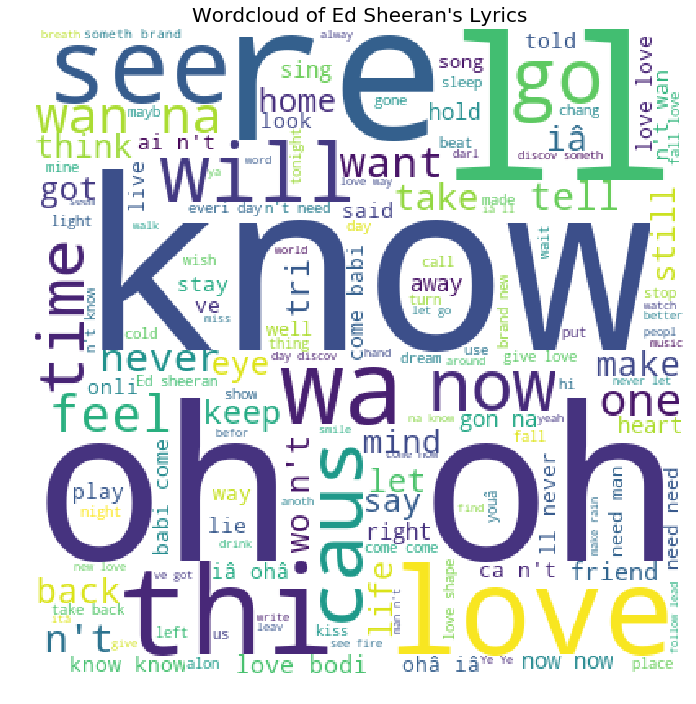

In [9]:
plt.figure(figsize=(15,12))
desc_wordcloud = WordCloud(
    width=400, height=400,
    background_color="white", 
    max_words=150, relative_scaling = 1).generate(wc_string1)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Ed Sheeran's Lyrics", fontsize=20)
plt.show()

It does show a few things but it's not entirely useful. There are some words that appear way too many times but should not be there like `n't`, `oh`, `ll` and others. Also, `love` appears multiple times in the wordcloud, which is wrong.